In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyqg_subgrid_experiments as pse

In [2]:
param = pse.ZB2020Parameterization()

dataset = pse.Dataset('../pyqg_subgrid_experiments/tests/fixtures/train.nc')

In [3]:
preds, sims, distances = param.test_on(dataset, n_simulations=1, artifact_dir='/tmp/pyqg')

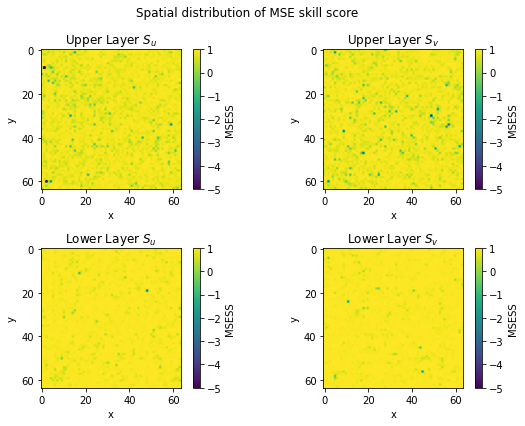

In [4]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Spatial distribution of MSE skill score")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_spatial_skill"].isel(lev=z).data
            plt.imshow(arr, vmax=1, vmin=-5)
            plt.colorbar(label='MSESS')
            plt.xlabel("x")
            plt.ylabel("y")

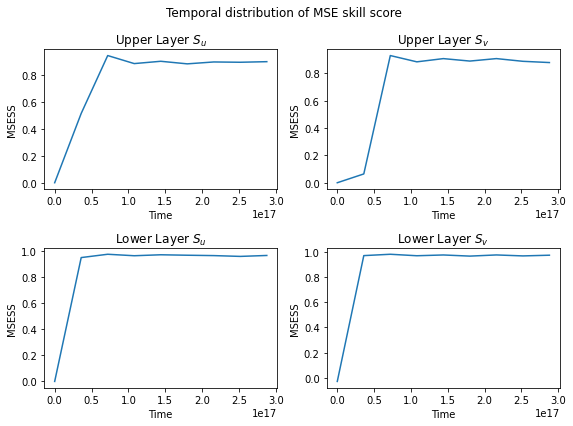

In [5]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Temporal distribution of MSE skill score")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_temporal_skill"].isel(lev=z).data
            plt.plot(preds.time, arr)
            plt.xlabel("Time")
            plt.ylabel("MSESS")

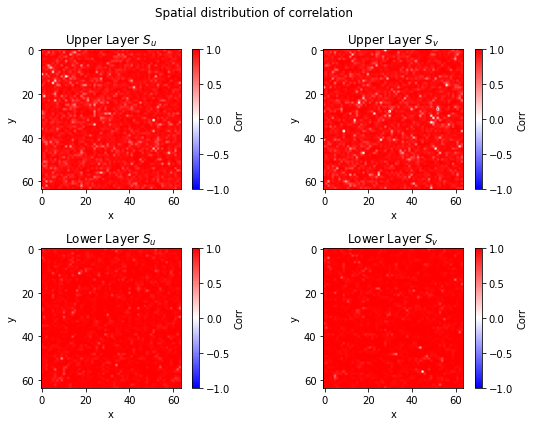

In [16]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Spatial distribution of correlation")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_spatial_correlation"].isel(lev=z).data
            plt.imshow(arr, vmin=-1, vmax=1, cmap='bwr')
            plt.colorbar(label='Corr')
            plt.xlabel("x")
            plt.ylabel("y")

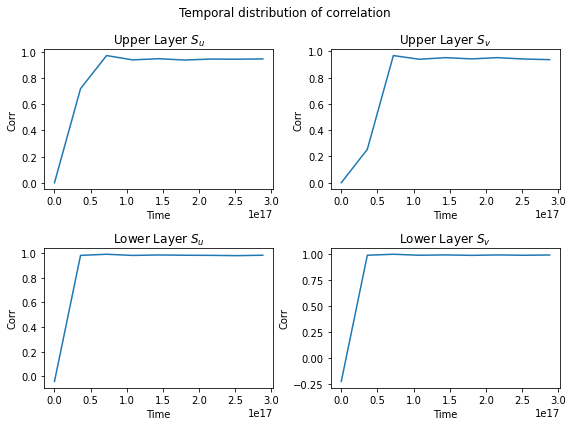

In [17]:
with pse.plot_helpers.figure_grid(2,2) as g:
    g.title("Temporal distribution of correlation")
    for z in [0,1]:
        for velocity in ['u','v']:
            g.next(title=f"{['Upper','Lower'][z]} Layer $S_{velocity}$")
            arr = preds[f"{velocity}_forcing_advection_temporal_correlation"].isel(lev=z).data
            plt.plot(preds.time, arr)
            plt.xlabel("Time")
            plt.ylabel("Corr")

In [6]:
distances

defaultdict(dict,
            {'q1_wasserstein_distance': 3.2647563945166296e-07,
             'u1_wasserstein_distance': 0.0032151851503090523,
             'v1_wasserstein_distance': 0.00140388449933454,
             'ke1_wasserstein_distance': 0.00020558972645245976,
             'enstrophy1_wasserstein_distance': 1.137601127864528e-12,
             'vorticity1_wasserstein_distance': 1.8988208012128954e-07,
             'q2_wasserstein_distance': 9.674642284134545e-08,
             'u2_wasserstein_distance': 0.0005540990648954525,
             'v2_wasserstein_distance': 0.0004959757572876866,
             'ke2_wasserstein_distance': 7.308001963393998e-06,
             'enstrophy2_wasserstein_distance': 9.420336880750732e-15,
             'vorticity2_wasserstein_distance': 1.5407000144878193e-08,
             'paramspec_mean_difference': 1.0946877383118382e-20,
             'entspec_mean_difference': 4.892036515685325e-25,
             'entspec_loglog_slope_difference': -0.7956368903

In [7]:
lores = pse.Dataset('../pyqg_subgrid_experiments/tests/fixtures/lores.nc')

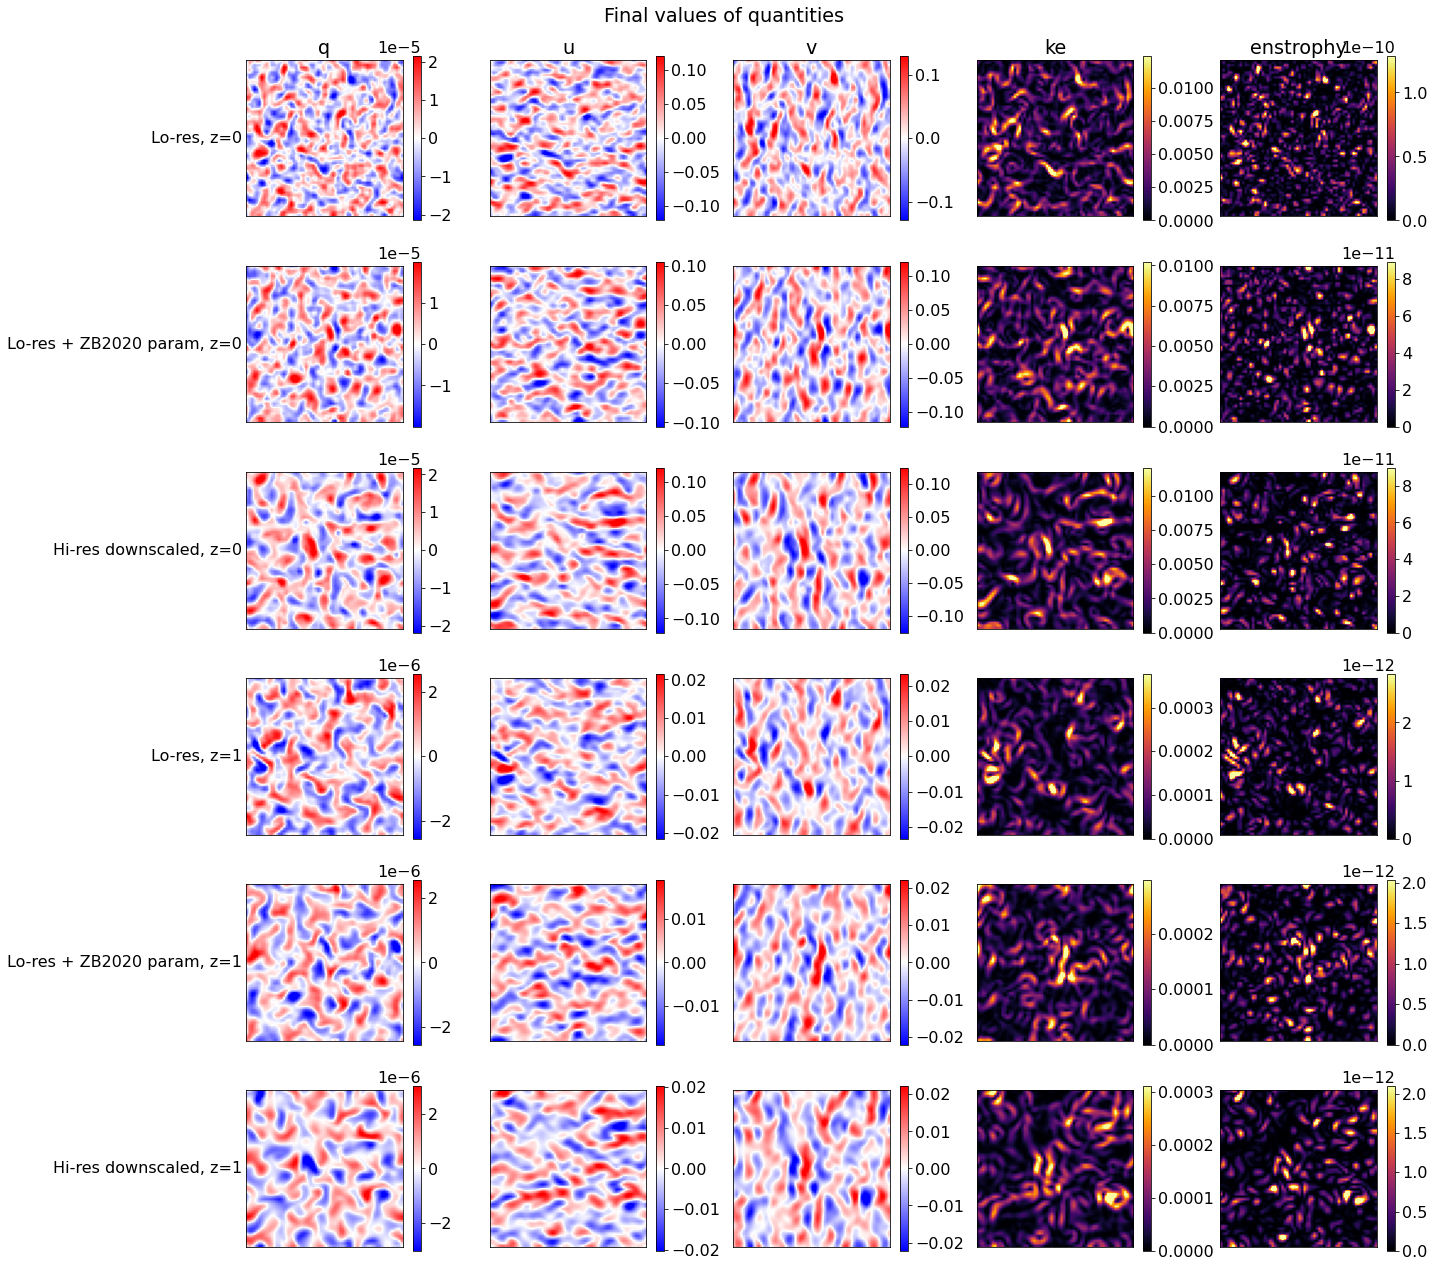

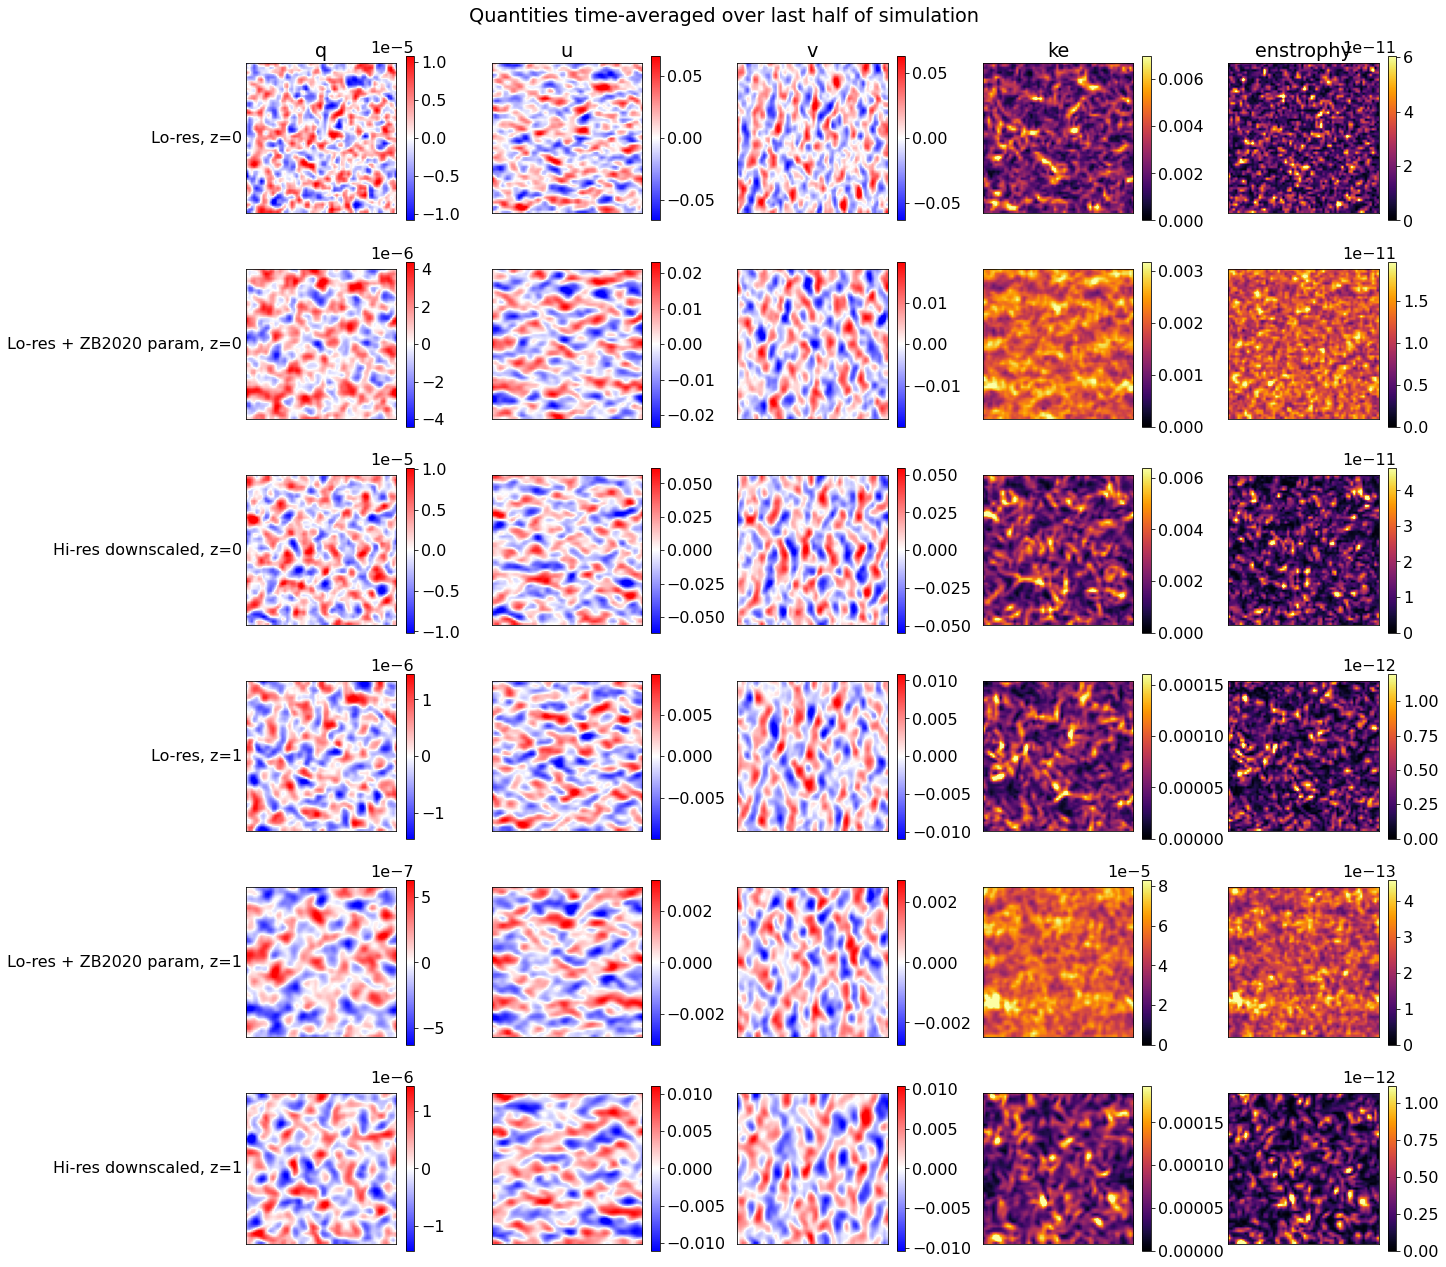

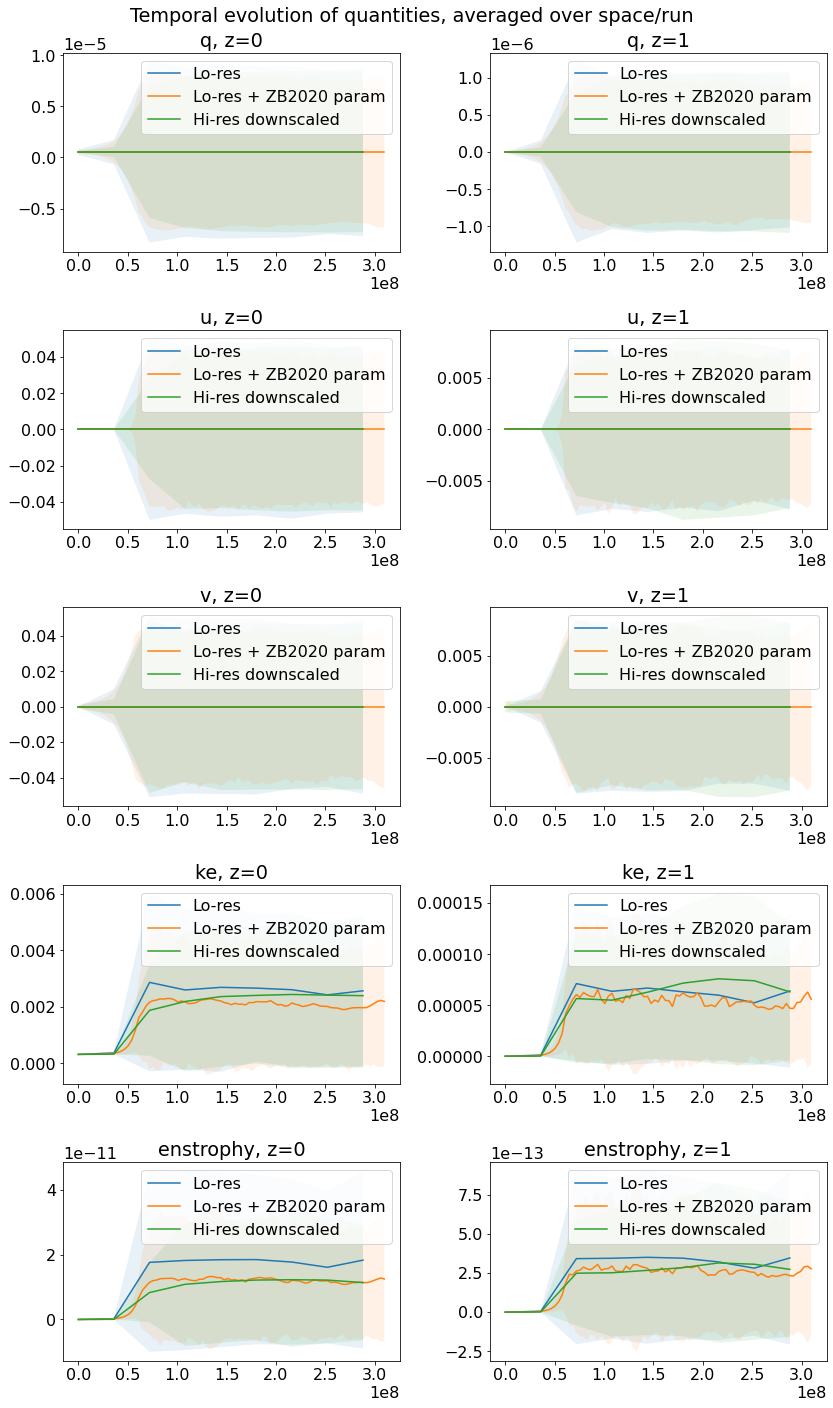

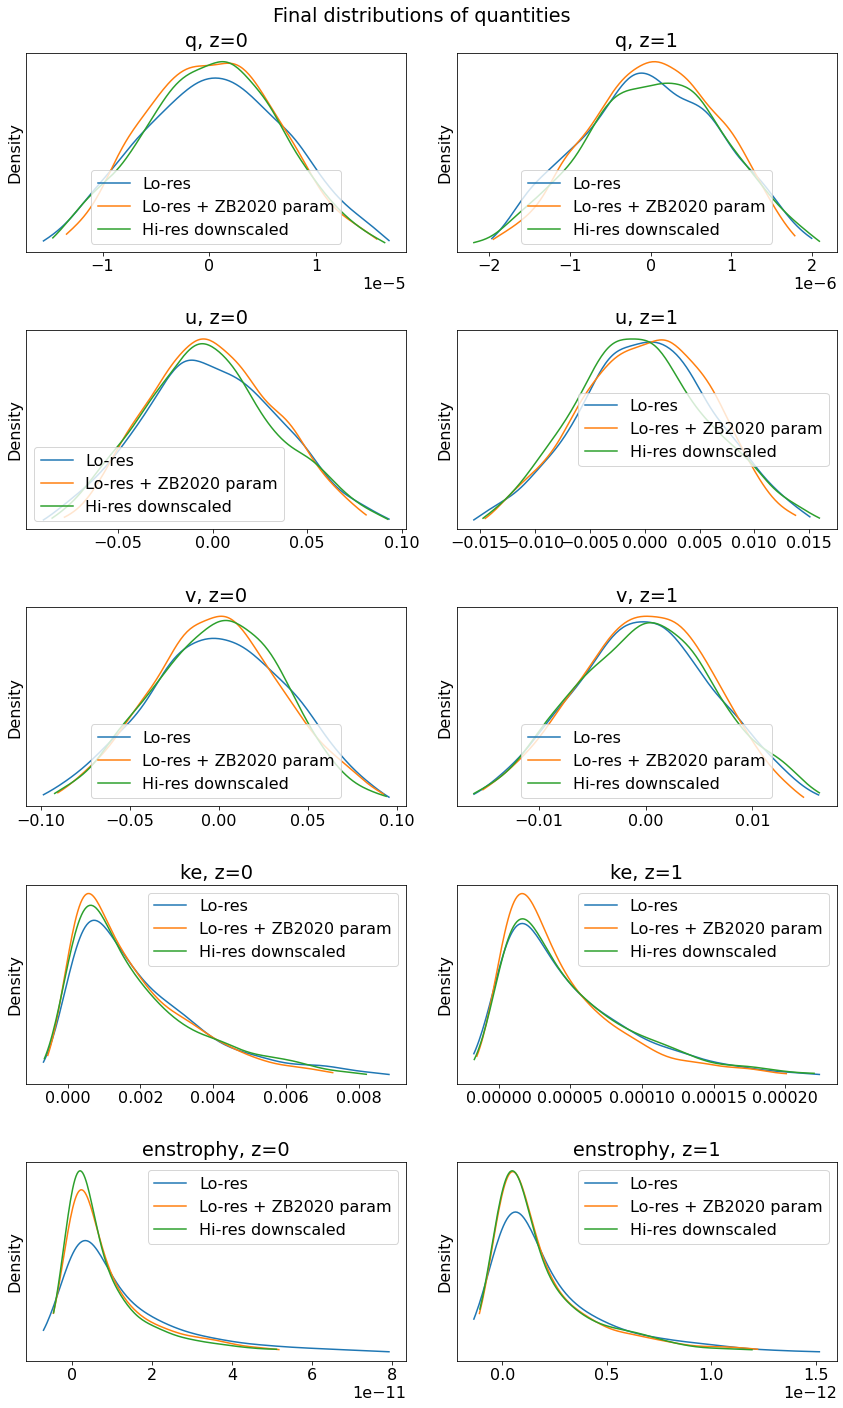

/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:645: RuntimeWarning: divide by zero encountered in log
  lr = linregress(np.log(k[i:j]), np.log(q[i:j]))
/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:645: RuntimeWarning: invalid value encountered in log
  lr = linregress(np.log(k[i:j]), np.log(q[i:j]))
/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:645: RuntimeWarning: divide by zero encountered in log
  lr = linregress(np.log(k[i:j]), np.log(q[i:j]))
/opt/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/andrewross/code/pyqg_experiments/pyqg_subgrid_experiments/plot_helpers.py:645: RuntimeWarning: invalid value encountered in log
  lr =

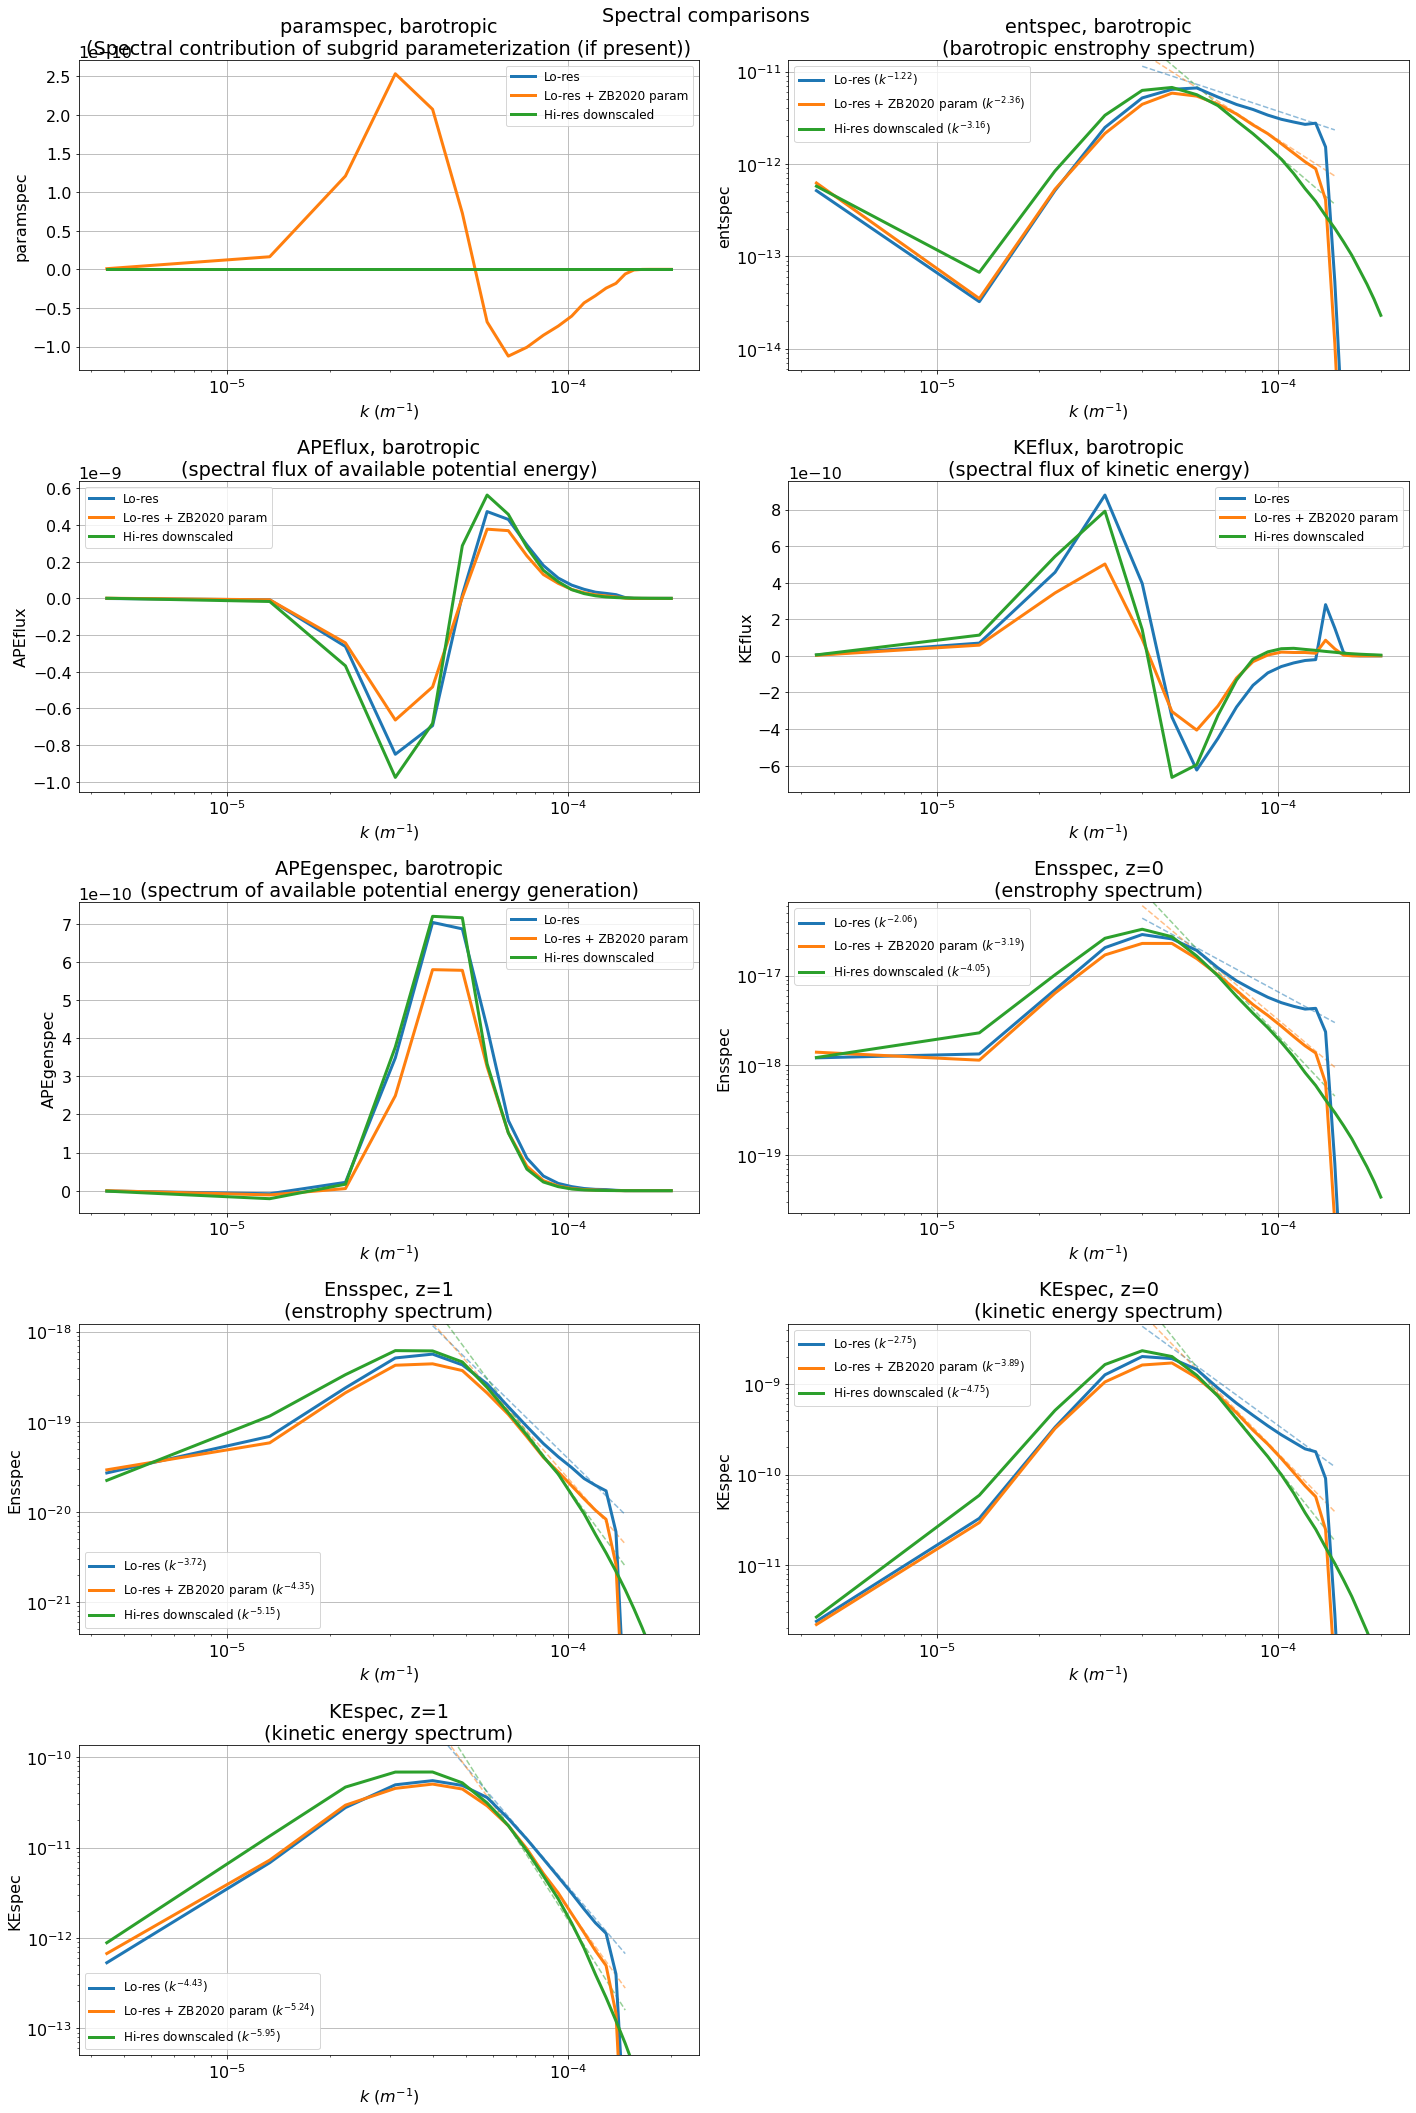

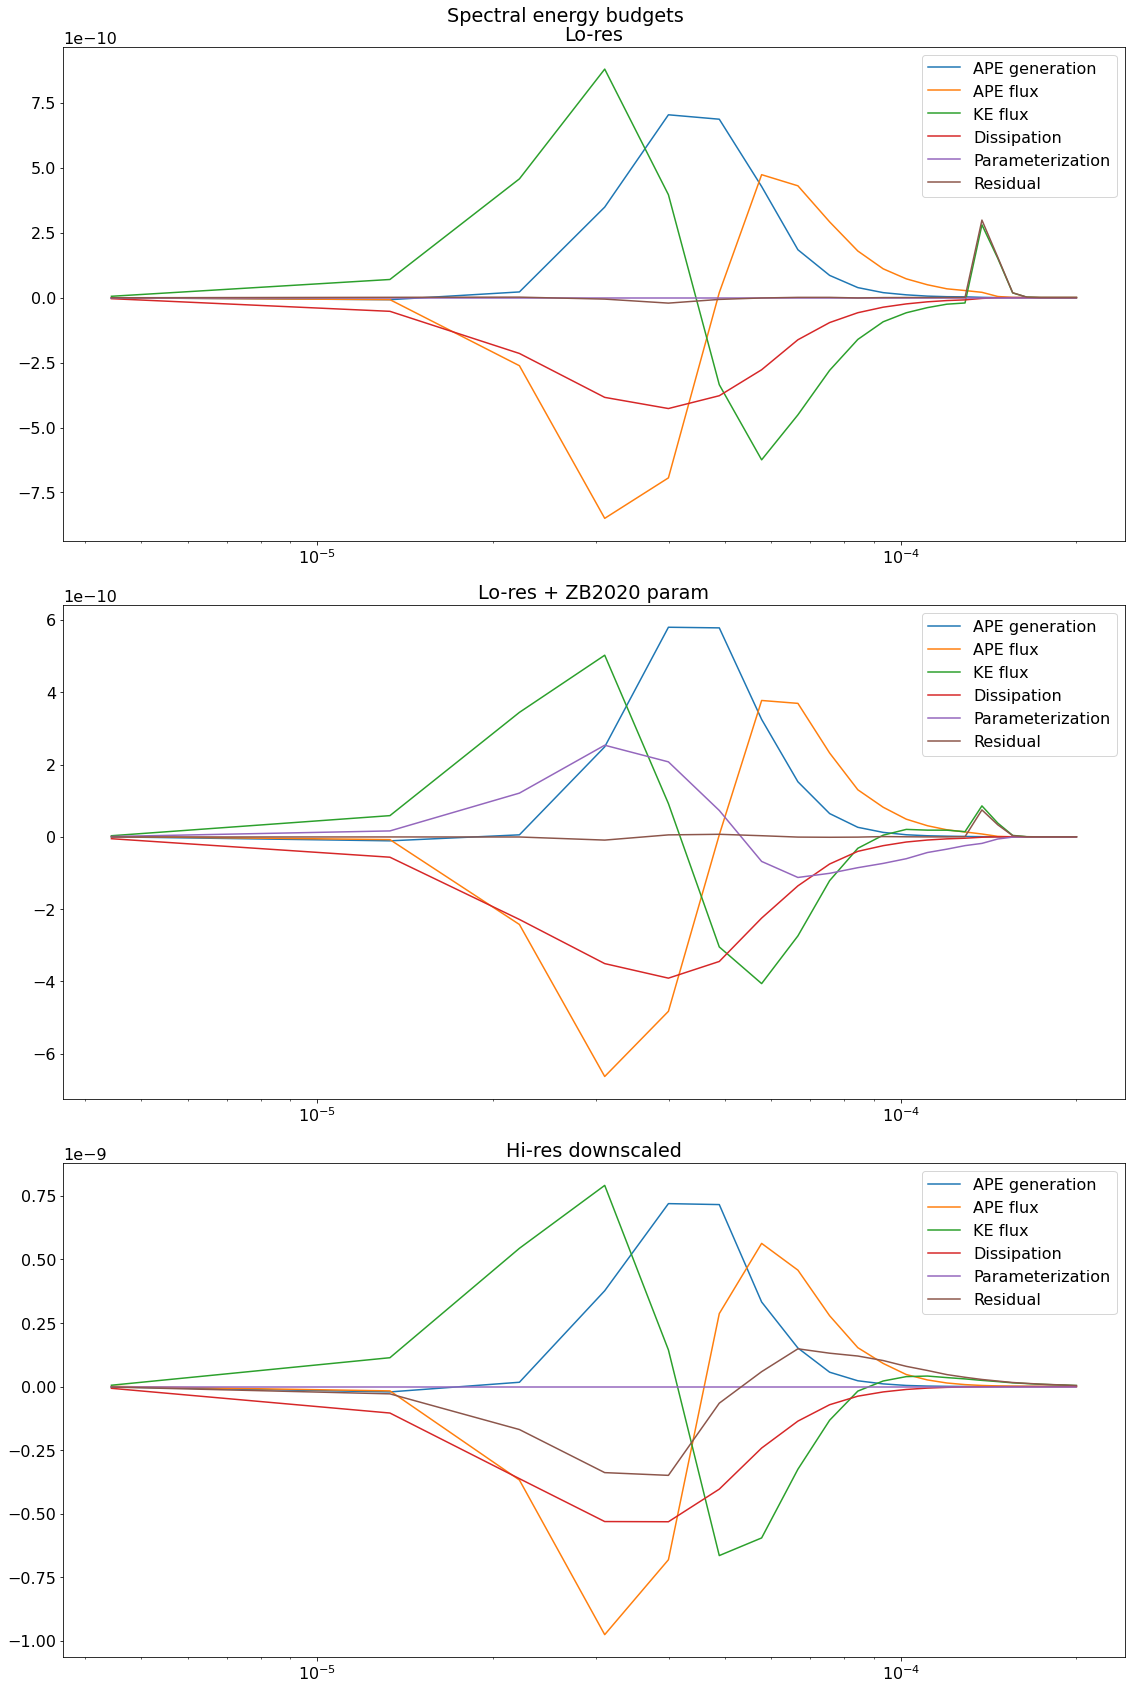

In [8]:
pse.plot_helpers.compare_simulations(
    lores.assign_attrs(label='Lo-res'),
    sims.assign_attrs(label='Lo-res + ZB2020 param'),
    dataset.assign_attrs(label='Hi-res downscaled'),
)

In [9]:
# Should be fast (simulations cached)
preds, sims, distances = param.test_on(dataset, n_simulations=1, artifact_dir='/tmp/pyqg')

In [10]:
preds

<xarray.Dataset>
Dimensions:                                   (x: 64, y: 64, time: 9, lev: 2, run: 1)
Coordinates:
  * x                                         (x) float32 7.812e+03 ... 9.922...
  * y                                         (y) float32 7.812e+03 ... 9.922...
  * time                                      (time) timedelta64[ns] 0 days 0...
  * lev                                       (lev) int32 1 2
Dimensions without coordinates: run
Data variables: (12/25)
    u_forcing_advection_temporal_mse          (time, lev) float64 ...
    u_forcing_advection_temporal_skill        (time, lev) float64 ...
    u_forcing_advection_temporal_correlation  (time, lev) float64 ...
    v_forcing_advection_temporal_mse          (time, lev) float64 ...
    v_forcing_advection_temporal_skill        (time, lev) float64 ...
    v_forcing_advection_temporal_correlation  (time, lev) float64 ...
    ...                                        ...
    mse                                       (lev) float64 ...
    skill                                     (lev) float64 ...
    u_forcing_advection                       (run, time, lev, y, x) float32 ...
    v_forcing_advection                       (run, time, lev, y, x) float32 ...
    u_forcing_advection_predictions           (run, time, lev, y, x) float64 ...
    v_forcing_advection_predictions           (run, time, lev, y, x) float64 ...
Attributes: (12/26)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    hires:           256
    lores:           64
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...